ROCHETTE
LEVEQUE

# Chargement des Données

Nous importons le dataset pour obtenir une vue d'ensemble de ses caractéristiques et de ses variables.

In [1]:
data <- read.csv("../data/support2.csv")
head(data)

age      death sex    hospdead slos d.time dzgroup          
1 62.84998 0     male   0         5   2029   Lung Cancer      
2 60.33899 1     female 1         4      4   Cirrhosis        
3 52.74698 1     female 0        17     47   Cirrhosis        
4 42.38498 1     female 0         3    133   Lung Cancer      
5 79.88495 0     female 0        16   2029   ARF/MOSF w/Sepsis
6 93.01599 1     male   1         4      4   Coma             
  dzclass            num.co edu ⋯ crea      sod ph       glucose bun urine adlp
1 Cancer             0      11  ⋯ 1.1999512 141 7.459961 NA      NA  NA     7  
2 COPD/CHF/Cirrhosis 2      12  ⋯ 5.5000000 132 7.250000 NA      NA  NA    NA  
3 COPD/CHF/Cirrhosis 2      12  ⋯ 2.0000000 134 7.459961 NA      NA  NA     1  
4 Cancer             2      11  ⋯ 0.7999268 139       NA NA      NA  NA     0  
5 ARF/MOSF           1      NA  ⋯ 0.7999268 143 7.509766 NA      NA  NA    NA  
6 Coma               1      14  ⋯ 0.6999512 140 7.659180 NA      NA  NA    NA  
  adls sfdm2               adlsc
1 7                        7    
2 1    <2 mo. follow-up    1    
3 0    <2 mo. follow-up    0    
4 0    no(M2 and SIP pres) 0    
5 2    no(M2 and SIP pres) 2    
6 1    <2 mo. follow-up    1

# Description des Variables

Le dataset contient `nrow(data)` observations et `ncol(data)` variables. Voici une description des principales variables :

1.  **Variables Démographiques**

    -   `age` : Âge du patient (numérique).

    -   `sex` : Genre du patient (catégorique - "male" ou "female").

    -   `edu` : Niveau d'éducation, avec des valeurs manquantes.

    -   `income` : Niveau de revenu, également avec un nombre important de valeurs manquantes.

2.  **État de santé et résultats**

    -   `death` et `hospdead` : Indicateurs de mortalité (binaire).

    -   `slos` : Durée de séjour à l'hôpital.

    -   `d.time` : Durée jusqu’au décès ou au dernier suivi.

    -   `dzgroup` et `dzclass` : Variables catégorielles spécifiant le groupe de maladie et la classe.

3.  **Mesures cliniques**

    -   `sps`, `aps`, `scoma` : Scores représentant l'état de santé et le niveau de coma.

    -   Signes vitaux tels que `meanbp` (pression artérielle moyenne), `hrt` (fréquence cardiaque), `resp` (taux de respiration) et `temp` (température).

    -   Résultats de tests de laboratoire : `pafi`, `alb`, `bili`, `crea`, `sod`, `ph`, `glucose`, `bun` et `urine`.

4.  **Fonctionnalité et suivi**

    -   `adlp` et `adls` : Scores des activités de la vie quotidienne, avec de nombreuses valeurs manquantes.

    -   `sfdm2` : Statut de suivi, également avec quelques valeurs manquantes.

# Analyse des valeurs manquantes

Nous examinons le nombre de valeurs manquantes pour chaque variable.

In [2]:
missing_data_summary <- sapply(data, function(x) sum(is.na(x)))
missing_data_summary <- sort(missing_data_summary[missing_data_summary > 0], decreasing = TRUE)
missing_data_summary

adlp   urine glucose     bun totmcst     alb    adls    bili    pafi      ph 
   5641    4862    4500    4352    3475    3372    2867    2601    2325    2284 
  prg2m     edu   prg6m  totcst    wblc charges avtisst    crea  dnrday   scoma 
   1649    1634    1633     888     212     172      82      67      30       1 
    sps     aps  surv2m  surv6m  meanbp     hrt    resp    temp     sod 
      1       1       1       1       1       1       1       1       1

Les variables avec des valeurs manquantes significatives sont :

-   `edu` (niveau d'éducation),

-   `income`,

-   `pafi` (pression partielle en oxygène artériel),

-   `alb` (albumine),

-   `glucose`,

-   `bun` (azote uréique sanguin),

-   `urine`,

-   `adlp` et `adls` (scores d'activités de la vie quotidienne).

# Analyse des valeurs aberrantes

Pour détecter les valeurs aberrantes, nous analysons les valeurs situées en dehors de 1,5 fois l'écart interquartile (IQR).

In [3]:
find_outliers <- function(series) {
  q1 <- quantile(series, 0.25, na.rm = TRUE)
  q3 <- quantile(series, 0.75, na.rm = TRUE)
  iqr <- q3 - q1
  lower_bound <- q1 - 1.5 * iqr
  upper_bound <- q3 + 1.5 * iqr
  return(sum(series < lower_bound | series > upper_bound, na.rm = TRUE))
}

outliers_summary <- sapply(data[, sapply(data, is.numeric)], find_outliers)
outliers_summary <- sort(outliers_summary[outliers_summary > 0], decreasing = TRUE)
outliers_summary

scoma diabetes     hday     crea     bili  charges   dnrday     slos 
    1955     1778     1543      987      926      912      799      768 
  totcst  totmcst     wblc     resp   surv2m dementia      sps  glucose 
     749      495      399      313      307      296      283      272 
  d.time      bun       ph      sod      edu      aps     adlp    urine 
     267      267      260      256      199      178      149       92 
    pafi      age  avtisst      hrt   num.co      alb     temp   meanbp 
      90       56       43       40       25       15       14        6

# Interprétation des valeurs aberrantes

Les variables présentant le plus grand nombre de valeurs aberrantes sont :

-   `slos` : Durée de séjour, avec des valeurs extrêmes suggérant que certains patients ont eu de très longues hospitalisations.

-   `charges` et `totcst` : Frais hospitaliers avec des valeurs particulièrement élevées pour certains patients.

-   Les indicateurs de santé, tels que `bili`, `crea`, `glucose` et `bun`, présentent également des valeurs extrêmes, ce qui peut refléter des anomalies dans les conditions de santé de certains patients.

# Conclusion

Cette analyse descriptive permet d’identifier les variables avec des valeurs manquantes et des valeurs aberrantes, fournissant une base pour des traitements ultérieurs des données et des analyses plus approfondies.


# Valeurs manquantes

on supprime toutes les colonnes avec des valeurs manquantes

In [26]:
data_clean <- data[, colSums(is.na(data)) == 0]
head(data_clean)

age      death sex    hospdead slos d.time dzgroup          
1 62.84998 0     male   0         5   2029   Lung Cancer      
2 60.33899 1     female 1         4      4   Cirrhosis        
3 52.74698 1     female 0        17     47   Cirrhosis        
4 42.38498 1     female 0         3    133   Lung Cancer      
5 79.88495 0     female 0        16   2029   ARF/MOSF w/Sepsis
6 93.01599 1     male   1         4      4   Coma             
  dzclass            num.co income     race  hday diabetes dementia ca        
1 Cancer             0      $11-$25k   other 1    0        0        metastatic
2 COPD/CHF/Cirrhosis 2      $11-$25k   white 3    0        0        no        
3 COPD/CHF/Cirrhosis 2      under $11k white 4    0        0        no        
4 Cancer             2      under $11k white 1    0        0        metastatic
5 ARF/MOSF           1                 white 3    0        0        no        
6 Coma               1                 white 1    0        0        no        
  dnr    sfdm2               adlsc
1 no dnr                     7    
2        <2 mo. follow-up    1    
3 no dnr <2 mo. follow-up    0    
4 no dnr no(M2 and SIP pres) 0    
5 no dnr no(M2 and SIP pres) 2    
6 no dnr <2 mo. follow-up    1

On supprime toutes les variables issues du modèles précédents

In [ ]:
data_clean <- data_clean[, !names(data_clean) %in% "dnr"]
data_clean <- data_clean[, !names(data_clean) %in% "scoma"]
data_clean <- data_clean[, !names(data_clean) %in% "sps"]
data_clean <- data_clean[, !names(data_clean) %in% "surv2m"]
data_clean <- data_clean[, !names(data_clean) %in% "surv6m"]

head(data_clean)

age      death sex    hospdead slos d.time dzgroup          
1 62.84998 0     male   0         5   2029   Lung Cancer      
2 60.33899 1     female 1         4      4   Cirrhosis        
3 52.74698 1     female 0        17     47   Cirrhosis        
4 42.38498 1     female 0         3    133   Lung Cancer      
5 79.88495 0     female 0        16   2029   ARF/MOSF w/Sepsis
6 93.01599 1     male   1         4      4   Coma             
  dzclass            num.co income     race  hday diabetes dementia ca        
1 Cancer             0      $11-$25k   other 1    0        0        metastatic
2 COPD/CHF/Cirrhosis 2      $11-$25k   white 3    0        0        no        
3 COPD/CHF/Cirrhosis 2      under $11k white 4    0        0        no        
4 Cancer             2      under $11k white 1    0        0        metastatic
5 ARF/MOSF           1                 white 3    0        0        no        
6 Coma               1                 white 1    0        0        no        
  sfdm2               adlsc
1                     7    
2 <2 mo. follow-up    1    
3 <2 mo. follow-up    0    
4 no(M2 and SIP pres) 0    
5 no(M2 and SIP pres) 2    
6 <2 mo. follow-up    1

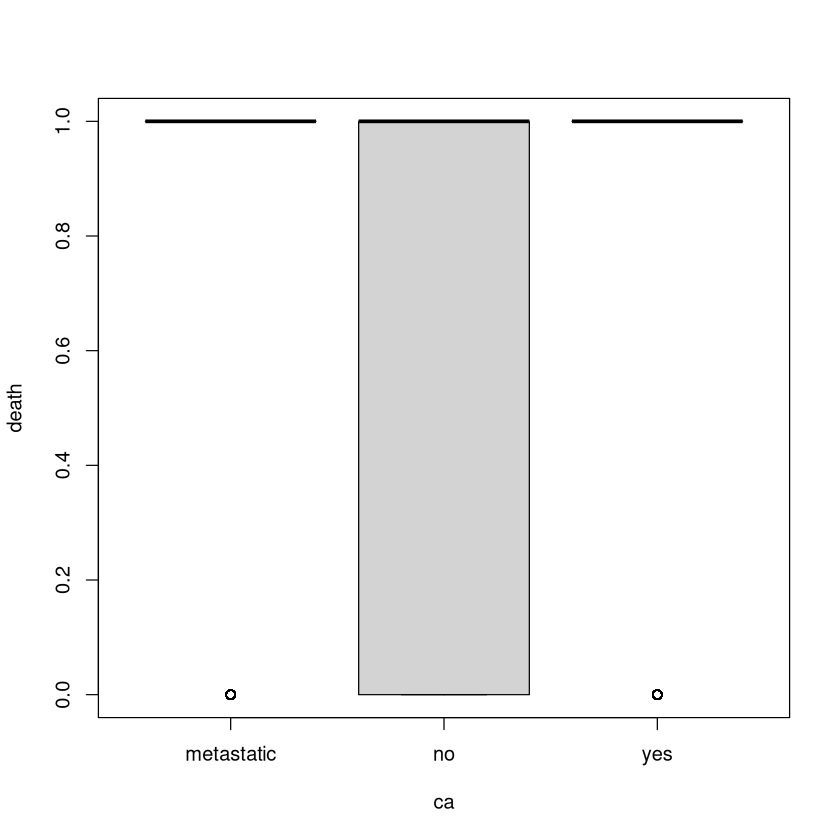

In [27]:
boxplot(death ~ ca, data=data_clean)

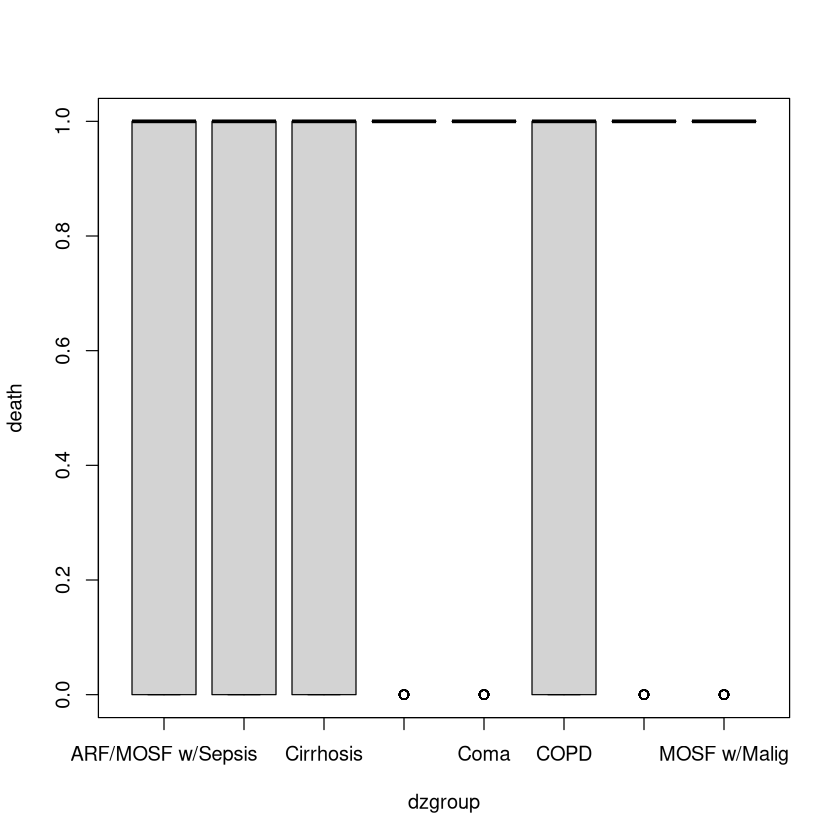

In [28]:
boxplot(death ~ dzgroup, data=data_clean)